# Project Details

**Scenario**
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

**Characters and teams**
● Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.
● Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.
● Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.
● Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

**About the company**
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

**Ask
Three questions will guide the future marketing program:**
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

**Moreno has assigned you the first question to answer: How do annual members and casual riders use Cyclistic bikes differently?
You will produce a report with the following deliverables:**

1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis

# Methodology

**1. Ask:**

Business Task - **How do annual members and casual riders use Cyclistic bikes differently?**

**2. Prepare:**

- Download previous 12 months of data
- The license has been made available by Motivate International Inc.

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Import dataset

The dataset was provided by google for the purpose of this project. 12 months of trip data waas downloaded as .csv files.

In [2]:
Jan_2021 = pd.read_csv('../input/cyclistic-dataset-2021/202101-divvy-tripdata.csv')
Feb_2021 = pd.read_csv('../input/cyclistic-dataset-2021/202102-divvy-tripdata.csv')
March_2021 = pd.read_csv('../input/cyclistic-dataset-2021/202103-divvy-tripdata.csv')
April_2021 = pd.read_csv('../input/cyclistic-dataset-2021/202104-divvy-tripdata.csv')
May_2021 = pd.read_csv('../input/cyclistic-dataset-2021/202105-divvy-tripdata.csv')
June_2021 = pd.read_csv('../input/cyclistic-dataset-2021/202106-divvy-tripdata.csv')
July_2021 = pd.read_csv('../input/cyclistic-dataset-2021/202107-divvy-tripdata.csv')
Aug_2021 = pd.read_csv('../input/cyclistic-dataset-2021/202108-divvy-tripdata.csv')
Sept_2021 = pd.read_csv('../input/cyclistic-dataset-2021/202109-divvy-tripdata.csv')
Oct_2021 = pd.read_csv('../input/cyclistic-dataset-2021/202110-divvy-tripdata.csv')
Nov_2021 = pd.read_csv('../input/cyclistic-dataset-2021/202111-divvy-tripdata.csv')
Dec_2021 = pd.read_csv('../input/cyclistic-dataset-2021/202112-divvy-tripdata.csv')


**Combine into one table**

In [3]:
all_trips = pd.concat([Jan_2021, Feb_2021, March_2021, April_2021, May_2021, June_2021, July_2021, Aug_2021, Sept_2021, Oct_2021, Nov_2021, Dec_2021])

**View new combined table**

In [4]:
all_trips.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


In [5]:
all_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


After analyzing the data, we can conclude the dataframe has the following:

* 13 Columns
* 5595063 rows
* There are missing values in the end_station_name and end_station_id columns
* There are wrong data types that need to be converted


**3. Process:**

Clean and transform data, so its ready for Analysis

**Check for duplicate entries**

In [6]:
all_trips.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
247535    False
247536    False
247537    False
247538    False
247539    False
Length: 5595063, dtype: bool

# Remove irrelevant data
Some of the columns have missing values and are not useful for analysis



In [7]:
all_trips = all_trips.drop(['start_station_name','start_station_id','end_station_name','end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'], axis = 1)

# Convert data types

started_at and ended_at data type has to be converted to datatime

In [8]:
all_trips['started_at'] = pd.to_datetime(all_trips['started_at'])
all_trips['ended_at'] = pd.to_datetime(all_trips['ended_at'])

We can add new columns like ride_length, day_of_week and month to further analyze the date

In [9]:
all_trips['day'] = all_trips.started_at.dt.day_name()
all_trips['month'] = all_trips.started_at.dt.month_name()
all_trips['ride_length']= pd.to_timedelta((all_trips.ended_at - all_trips.started_at)).astype('timedelta64[m]')


In [10]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

all_trips["day"] = pd.Categorical(all_trips["day"], categories = days)

In [11]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

all_trips["month"] = pd.Categorical(all_trips["month"], categories = months)

Verify newly created columns

In [12]:
all_trips.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,day,month,ride_length
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,Saturday,January,10.0
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,Wednesday,January,4.0
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,Thursday,January,1.0
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,Thursday,January,11.0
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,Saturday,January,0.0


**Save the cleaned data to a new .csv file**

In [13]:
all_trips.to_csv('all_trips_cleaned.csv', index = False)

**4. Analyze Data:**

Analyze ride type by User

In [14]:
all_trips.groupby(["member_casual","rideable_type"]).ride_length.agg([len,np.sum,np.mean,np.median,np.max,np.min])

len         sum       mean  median     amax  \
member_casual rideable_type                                                    
casual        classic_bike   1266657  36021794.0  28.438475    16.0   1559.0   
              docked_bike     312342  25300603.0  81.002885    28.0  55944.0   
              electric_bike   950006  18369545.0  19.336241    13.0    487.0   
member        classic_bike   1984371  27099708.0  13.656573     9.0   1559.0   
              docked_bike          1         2.0   2.000000     2.0      2.0   
              electric_bike  1081686  13198976.0  12.202225     8.0    480.0   

                             amin  
member_casual rideable_type        
casual        classic_bike  -54.0  
              docked_bike   -41.0  
              electric_bike -59.0  
member        classic_bike  -55.0  
              docked_bike     2.0  
              electric_bike -54.0

Analyze Ride length by Day of the week

In [15]:
all_trips.groupby(["member_casual","day"]).ride_length.agg([len,np.sum,np.mean,np.median,np.max,np.min])

len         sum       mean  median     amax  amin
member_casual day                                                            
casual        Monday     286376   8988067.0  31.385546    15.0  31681.0  -2.0
              Tuesday    274392   7540888.0  27.482171    14.0  38922.0  -4.0
              Wednesday  278950   7578202.0  27.166883    13.0  38963.0  -1.0
              Thursday   286064   7784536.0  27.212568    13.0  49107.0   0.0
              Friday     364080  10870937.0  29.858649    14.0  55691.0  -2.0
              Saturday   558000  19092756.0  34.216409    17.0  55944.0  -1.0
              Sunday     481143  17836556.0  37.071216    18.0  53921.0 -59.0
member        Monday     416212   5309910.0  12.757705     9.0   1499.0  -1.0
              Tuesday    465513   5724831.0  12.297897     9.0   1499.0  -3.0
              Wednesday  477192   5883583.0  12.329593     9.0   1499.0  -8.0
              Thursday   451524   5547797.0  12.286826     9.0   1499.0  -1.0
              Friday     446428   5730098.0  12.835436     9.0   1499.0  -3.0
              Saturday   433047   6398346.0  14.775177    10.0   1559.0  -2.0
              Sunday     376142   5704121.0  15.164807    10.0   1499.0 -55.0

**5. Share:**

**Visualizations**

Distribution by User type

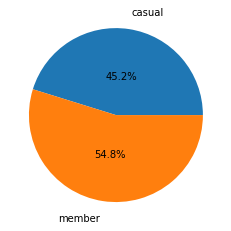

In [16]:
plt.pie(all_trips["member_casual"].value_counts(ascending = True), autopct="%.1f%%", labels = ['casual', 'member'], labeldistance = 1.2, pctdistance = 0.45)
plt.show()

Total Rides by User type

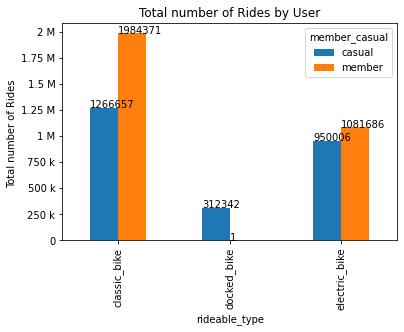

In [17]:
data_ra = all_trips.pivot_table(index = 'rideable_type', values = 'ride_length', columns = 'member_casual',aggfunc = [len, np.mean])

ax = data_ra["len"].plot.bar()

for i, number in enumerate(data_ra['len']['casual']):
    plt.text(x=i-0.25, y= number + 1, s=round(number,2))
for i, number in enumerate(data_ra['len']['member']):
    plt.text(x=i, y= number + 1, s=round(number,2))

ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.set(ylabel = "Total number of Rides ", title = "Total number of Rides by User")

plt.show()


Average ride length by User type

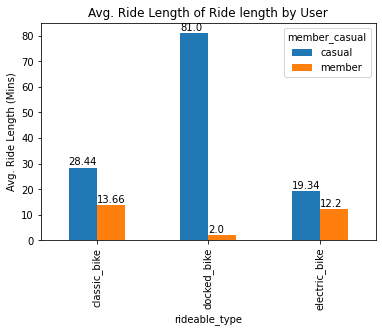

In [18]:
data_ra = all_trips.pivot_table(index = 'rideable_type', values = 'ride_length', columns = 'member_casual',aggfunc = [len, np.mean])

ax = data_ra["mean"].plot.bar()

for i, number in enumerate(data_ra['mean']['casual']):
    plt.text(x=i-0.25, y= number + 1, s=round(number,2))
for i, number in enumerate(data_ra['mean']['member']):
    plt.text(x=i, y= number + 1, s=round(number,2))

ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.set(ylabel = "Avg. Ride Length (Mins)", title = "Avg. Ride Length of Ride length by User")

plt.show()

Total Rides by Month

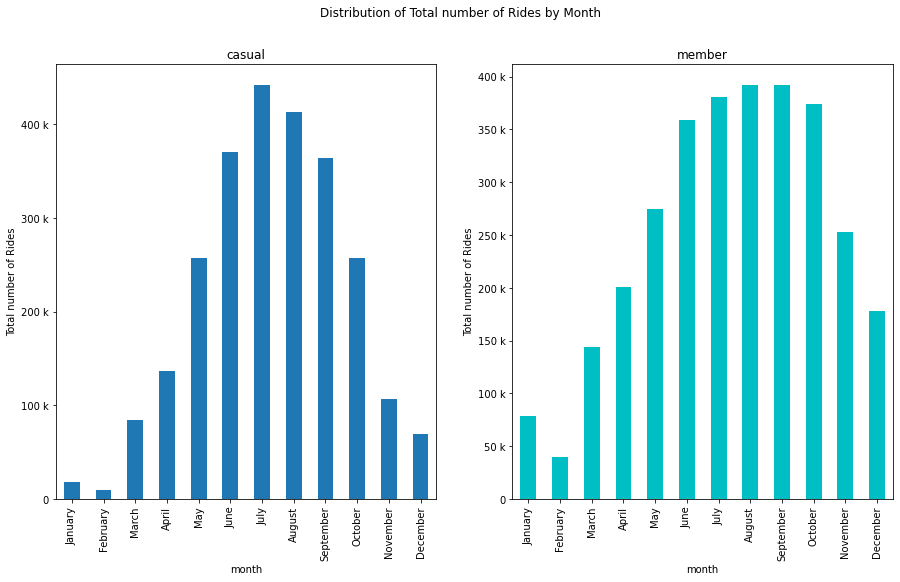

In [19]:
month_bar = all_trips.groupby(["member_casual","month"])["ride_length"].count()

fig,ax = plt.subplots(1,2, figsize = (15,8))

ax1 = month_bar["casual"].plot.bar(ax =ax[0], title = 'casual', ylabel = 'Total number of Rides')
ax1.yaxis.set_major_formatter(ticker.EngFormatter())

ax2 = month_bar["member"].plot.bar(ax =ax[1], title = 'member', color= '#00BFC4', ylabel = 'Total number of Rides')
ax2.yaxis.set_major_formatter(ticker.EngFormatter())


fig.suptitle('Distribution of Total number of Rides by Month')


plt.show()

Total Rides by Day

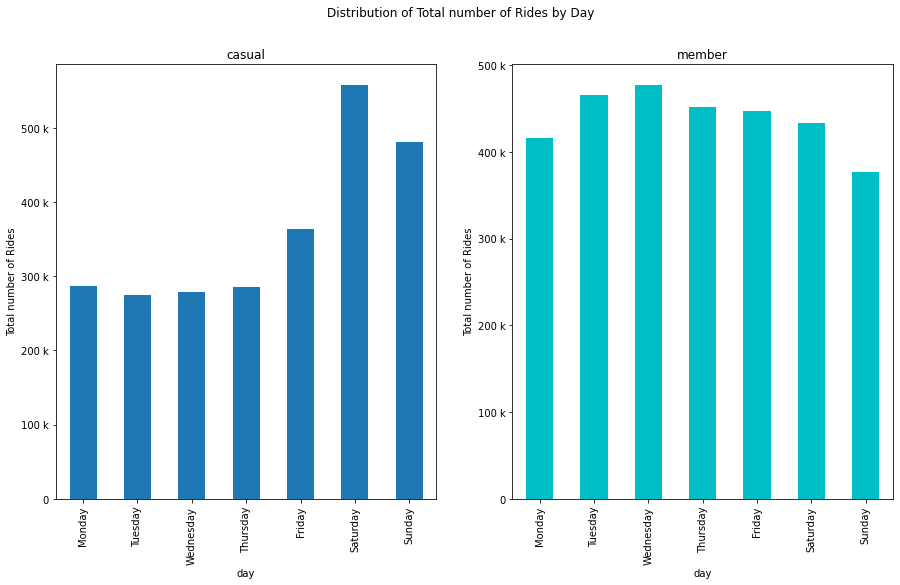

In [20]:
day_bar = all_trips.groupby(["member_casual","day"])["ride_length"].agg([len, np.mean])

fig,ax = plt.subplots(1,2, figsize = (15,8))

ax1 = day_bar.loc["casual", "len"].plot.bar(ax =ax[0], title = 'casual', ylabel = 'Total number of Rides')
ax1.yaxis.set_major_formatter(ticker.EngFormatter())

ax2 = day_bar.loc["member","len"].plot.bar(ax =ax[1], title = 'member' , color= '#00BFC4', ylabel = 'Total number of Rides')
ax2.yaxis.set_major_formatter(ticker.EngFormatter())

fig.suptitle('Distribution of Total number of Rides by Day')

plt.show()

**6. Act:**

Conclusions:

Casual users bike for longer durations on each trip than annual members. Suggests annual members use the bikes for relatively short commutes to work while casual users use it for long rides Ex: tourists using it for sightseeing.

Casual users bike more on the weekends. Indicative of tourists/visitors and users using for leisure. Annual members bike more on the weekdays. Indicative of work commuters.

There is a steep decline in usage amongst casual users towards the end of the year (Nov-Dec) compared to annual members who have fair usage. This could be attributed to tourists not travelling into Chicago during peak winter.

Classis bikes are the most popular choice for both type of users. However, casual users spend more time on average on the docked bikes while this is the least popular bike type amongst annual members.






Recommendations:

Promotions during the weekend/holidays: Casual users are most active on the weekends. Attract attention of casual riders by focusing marketing efforts heavily during the weekends and lighter during the weekdays. Trial promos can be offered.

Make the Annual membership perks more attractive by offering rewards through a loyalty program. Tie up with companies to offer incentives and Introduce referral programs.
  
Focus marketing efforts to show statistics of how it works out cheaper to use the bikes during the weekends with the annual membership. After each ride, the app could show how much money could be saved by save by switching to an annual membership. Have the option to adjust the diff by signing up before the next ride.